In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.wkt import loads
import statsmodels.api as sm

In [43]:
tracts_demo = pd.read_csv('../Data/demog_tract_level.csv',index_col=0)
tracts_demo.head()

,Pop_Tot,Pop_18,%White,%Black,%Hispanic_Latino,%Asian,%Other,%Mixed,Median_Income,%Edu_hs,%Edu_bac
Tract,,,,,,,,,,,
36005020000,4711,3310,2.759499,9.382297,61.197198,23.392061,2.080238,1.188707,40184,71.873112,23.685801
36005020501,6976,5313,1.046445,26.333142,71.530963,0.788417,0.000000,0.301032,17601,71.052136,9.655562
36005020502,2160,1737,1.666667,26.435185,71.481481,0.138889,0.000000,0.277778,18919,64.824410,17.962003
36005020900,4287,3297,3.825519,37.602053,57.872638,0.256590,0.209937,0.233263,31190,74.309979,14.922657
36005021001,8930,7185,2.183651,50.470325,36.125420,8.801792,1.209406,1.209406,54076,85.901183,24.982603


In [44]:
# transit_access = pd.read_csv('../Data/tracts_subway_bus_access.csv',index_col=0)
# transit_access.head()
transit_access=pd.read_csv('../Data/commute_tt_results.csv',index_col=0)
transit_access

,ctlabel,borocode,boroname,ct2020,boroct2020,ntaname,nta2020,cdta2020,cdtaname,shape_leng,...,Shape_Leng,Shape_Area,Center_Lat,Center_Lon,area_km2,formatted,CBD1,CBD2,CBD3,CBD4
36061000201,2.01,1,Manhattan,201,1000201,Chinatown-Two Bridges,MN0301,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),4754.495247,...,4754.495247,9.723121e+05,40.711869,-73.985848,0.090331,40.711868746013195%2C-73.98584800829617,25.0,28.0,14.0,21.0
36061000600,6.00,1,Manhattan,600,1000600,Chinatown-Two Bridges,MN0301,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),6976.286456,...,6976.286456,2.582705e+06,40.711951,-73.989477,0.239943,40.71195059938643%2C-73.98947678968231,21.0,24.0,10.0,17.0
36061001401,14.01,1,Manhattan,1401,1001401,Lower East Side,MN0302,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),5075.332000,...,5075.332000,1.006117e+06,40.715160,-73.987332,0.093472,40.71516046573825%2C-73.98733213729895,22.0,25.0,11.0,17.0
36061001402,14.02,1,Manhattan,1402,1001402,Lower East Side,MN0302,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),4459.156019,...,4459.156019,1.226206e+06,40.717513,-73.985882,0.113919,40.71751329862123%2C-73.98588163142483,17.0,20.0,12.0,18.0
36061001800,18.00,1,Manhattan,1800,1001800,Lower East Side,MN0302,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),6391.921174,...,6391.921174,2.399277e+06,40.719046,-73.990842,0.222902,40.71904611994839%2C-73.9908421668771,19.0,21.0,12.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36005007300,73.00,2,Bronx,7300,2007300,Melrose,BX0102,BX01,BX01 Melrose-Mott Haven-Port Morris (CD 1 Appr...,5173.768958,...,5173.768958,1.507611e+06,40.814675,-73.909388,0.140062,40.81467459379946%2C-73.90938831456208,36.0,37.0,54.0,42.0
36081001902,19.02,4,Queens,1902,4001902,Long Island City-Hunters Point,QN0201,QN02,QN02 Long Island City-Sunnyside-Woodside (CD 2...,5659.156615,...,5659.156615,1.909110e+06,40.748149,-73.940048,0.177363,40.748149147697966%2C-73.94004805637216,24.0,16.0,35.0,34.0
36081017101,171.01,4,Queens,17101,4017101,Sunnyside Yards (South),QN0261,QN02,QN02 Long Island City-Sunnyside-Woodside (CD 2...,22732.905385,...,22732.905385,8.783519e+06,40.748665,-73.928182,0.816021,40.7486654597593%2C-73.9281822199964,27.0,23.0,43.0,39.0
36081047500,475.00,4,Queens,47500,4047500,Elmhurst,QN0401,QN04,QN04 Elmhurst-Corona (CD 4 Approximation),8890.142310,...,8890.142310,3.028836e+06,40.733642,-73.875652,0.281390,40.73364210482787%2C-73.87565224876047,40.0,34.0,56.0,52.0


In [45]:
tracts_demo

,Pop_Tot,Pop_18,%White,%Black,%Hispanic_Latino,%Asian,%Other,%Mixed,Median_Income,%Edu_hs,%Edu_bac
Tract,,,,,,,,,,,
36005020000,4711,3310,2.759499,9.382297,61.197198,23.392061,2.080238,1.188707,40184,71.873112,23.685801
36005020501,6976,5313,1.046445,26.333142,71.530963,0.788417,0.000000,0.301032,17601,71.052136,9.655562
36005020502,2160,1737,1.666667,26.435185,71.481481,0.138889,0.000000,0.277778,18919,64.824410,17.962003
36005020900,4287,3297,3.825519,37.602053,57.872638,0.256590,0.209937,0.233263,31190,74.309979,14.922657
36005021001,8930,7185,2.183651,50.470325,36.125420,8.801792,1.209406,1.209406,54076,85.901183,24.982603
...,...,...,...,...,...,...,...,...,...,...,...
36061021800,6236,5023,20.525978,58.611289,18.136626,1.860167,0.545221,0.320718,49482,81.206450,40.772447
36061028300,7949,6726,19.335766,5.535287,68.964650,4.981759,0.314505,0.868034,56855,80.255724,34.269997
36061029100,12165,9582,6.321414,5.318537,82.836005,4.069051,0.139745,1.315249,47054,70.632436,22.239616


In [46]:
#merge
tract_info = transit_access.join(tracts_demo,how = 'left')

tract_info.head()

,ctlabel,borocode,boroname,ct2020,boroct2020,ntaname,nta2020,cdta2020,cdtaname,shape_leng,...,Pop_18,%White,%Black,%Hispanic_Latino,%Asian,%Other,%Mixed,Median_Income,%Edu_hs,%Edu_bac
36061000201,2.01,1,Manhattan,201,1000201,Chinatown-Two Bridges,MN0301,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),4754.495247,...,2120.0,10.472727,6.618182,40.181818,42.654545,0.000000,0.072727,29500.0,55.990566,17.122642
36061000600,6.00,1,Manhattan,600,1000600,Chinatown-Two Bridges,MN0301,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),6976.286456,...,8585.0,4.675747,7.267737,28.339093,58.843261,0.874161,0.000000,16600.0,52.486896,17.157833
36061001401,14.01,1,Manhattan,1401,1001401,Lower East Side,MN0302,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),5075.332000,...,2523.0,68.220899,3.240741,8.796296,15.674603,0.264550,3.802910,103750.0,95.838288,69.480777
36061001402,14.02,1,Manhattan,1402,1001402,Lower East Side,MN0302,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),4459.156019,...,2790.0,28.051683,5.542333,31.587895,29.955797,0.000000,4.862292,27355.0,71.648746,37.849462
36061001800,18.00,1,Manhattan,1800,1001800,Lower East Side,MN0302,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),6391.921174,...,6217.0,28.771361,5.406600,12.021214,45.742487,4.419564,3.638774,50568.0,68.907833,36.947081


In [47]:
tract_info['mean_commute']=tract_info[['CBD1','CBD2','CBD3','CBD4']].mean(axis=1)
tract_info['min_commute']=tract_info[['CBD1','CBD2','CBD3','CBD4']].min(axis=1)

In [48]:
# tract_info['geometry'] = tract_info['geometry'].apply(loads)
# #proj_4326 = Proj("epsg:4326")
# tract_info = gpd.GeoDataFrame(tract_info,geometry = 'geometry')

AttributeError: 'Line2D' object has no property 'column'

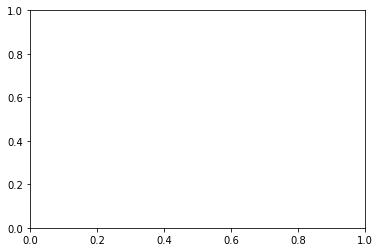

In [50]:
tract_info.plot(column = 'min_commute', k=10, scheme='Quantiles', legend=True, 
              missing_kwds={"color": "lightgrey", "edgecolor": "red", "hatch": "///", "label": "Zero values"},
              legend_kwds={'bbox_to_anchor': (1.05, 1), 'loc': 'upper left'})

In [51]:
#create a fake transit time column for example
# values = np.random.normal(30, 10, len(tract_info))+np.random.randint(low=0, high=10, size=len(tract_info))
# # Set values less than or equal to zero to 1 (minimum value)
# values = np.maximum(values, 1)
# tract_info['commute_time'] = values

In [52]:
tract_info.head()#'Pop_Tot']

,ctlabel,borocode,boroname,ct2020,boroct2020,ntaname,nta2020,cdta2020,cdtaname,shape_leng,...,%Black,%Hispanic_Latino,%Asian,%Other,%Mixed,Median_Income,%Edu_hs,%Edu_bac,mean_commute,min_commute
36061000201,2.01,1,Manhattan,201,1000201,Chinatown-Two Bridges,MN0301,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),4754.495247,...,6.618182,40.181818,42.654545,0.000000,0.072727,29500.0,55.990566,17.122642,22.00,14.0
36061000600,6.00,1,Manhattan,600,1000600,Chinatown-Two Bridges,MN0301,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),6976.286456,...,7.267737,28.339093,58.843261,0.874161,0.000000,16600.0,52.486896,17.157833,18.00,10.0
36061001401,14.01,1,Manhattan,1401,1001401,Lower East Side,MN0302,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),5075.332000,...,3.240741,8.796296,15.674603,0.264550,3.802910,103750.0,95.838288,69.480777,18.75,11.0
36061001402,14.02,1,Manhattan,1402,1001402,Lower East Side,MN0302,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),4459.156019,...,5.542333,31.587895,29.955797,0.000000,4.862292,27355.0,71.648746,37.849462,16.75,12.0
36061001800,18.00,1,Manhattan,1800,1001800,Lower East Side,MN0302,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),6391.921174,...,5.406600,12.021214,45.742487,4.419564,3.638774,50568.0,68.907833,36.947081,18.00,12.0


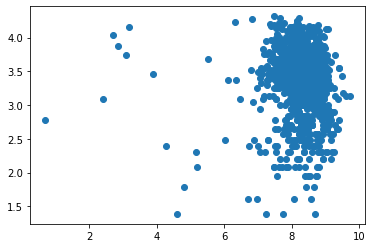

In [59]:
tract_info = tract_info[(tract_info['Pop_Tot'] != 0) & (tract_info['mean_commute'] != 0)].dropna(subset=['Pop_Tot','mean_commute'],how='any')
tract_info['ln Pop'] = np.log(tract_info['Pop_Tot'])
tract_info['ln commute'] = np.log(tract_info['min_commute'])
tract_info = tract_info.sort_values(by ='ln Pop')
plt.plot(tract_info['ln Pop'],tract_info['ln commute'],'o')

In [62]:
# Extract the two variables of interest
X = tract_info['ln Pop']
X = sm.add_constant(X)
y = tract_info['ln commute']

# Create the linear regression model
model = sm.OLS(y, X)

# Fit the model and print the results
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             ln commute   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.5158
Date:                Wed, 12 Apr 2023   Prob (F-statistic):              0.473
Time:                        13:24:46   Log-Likelihood:                -794.82
No. Observations:                1104   AIC:                             1594.
Df Residuals:                    1102   BIC:                             1604.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.4724      0.175     19.800      0.0

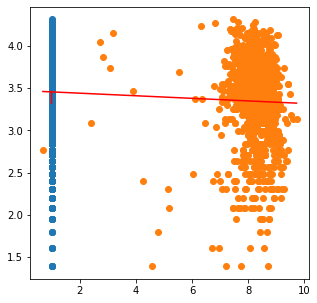

In [63]:
y_pred = results.predict(X)

fig, ax = plt.subplots(figsize = (5,5))
plt.plot(X,y,'o')
plt.plot(X,y_pred,'-r')
plt.show()

In [67]:
epsilon = y_pred - y

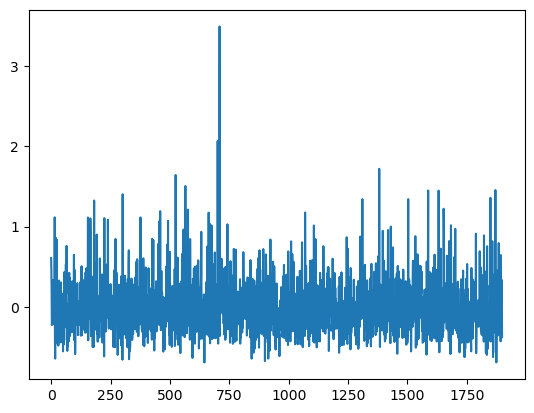

In [72]:
plt.plot(range(0,len(epsilon)),epsilon)